# Six input images pass through EfficientNetB4 with tabular data


###  Kaggle competetion https://www.kaggle.com/c/osic-pulmonary-fibrosis-progression

### Data source https://www.kaggle.com/c/osic-pulmonary-fibrosis-progression/data


In [ ]:
pip install pydicom #installation of pydicom

     |████████████████████████████████| 1.9 MB 8.1 MB/s 


In [ ]:
pip install tensorflow-addons #installation of tensorflow-addons

     |████████████████████████████████| 679 kB 8.1 MB/s 


In [ ]:
from google.colab import drive # Downloading Datasets into Google Drive via Google Colab
import os.path     # suitable for the operating system Python is running on
import os 
import cv2         # solve computer vision problems
import pydicom
import pandas as pd# data structures and operations for manipulating numerical tables and time series.
import numpy as np # support for large, multi-dimensional arrays and matrices, along with a large collection of high-level 
                   # mathematical functions to operate on these arrays.
import matplotlib.pyplot as plt #API for embedding plots into applications using GUI toolkits like Tkinter, wxPython, Qt, or GTK.
import tensorflow as tf # training and inference of deep neural networks
from tqdm.notebook import tqdm # display smart progress bars that show the progress of Python code execution
import seaborn as sns # a visualization library based on matplotlib

from sklearn.model_selection import train_test_split #Meta-transformer for selecting features based on importance weights

import tensorflow.keras.utils # Converts a Keras model to dot format and save to a file
from tensorflow.keras.utils import Sequence # Base object for fitting to a sequence of data, such as a dataset
from tensorflow.keras.layers import (Dense, Dropout, Activation, Flatten, Input, BatchNormalization, GlobalAveragePooling2D, Add, Conv2D, AveragePooling2D, 
    LeakyReLU, Concatenate, MaxPooling2D, GlobalMaxPooling2D)
# class Activation: Applies an activation function to an output;
# class BatchNormalization: Layer that normalizes its inputs.
# class Concatenate: Layer that concatenates a list of inputs.
# class Dense: Just your regular densely-connected NN layer;
# class Dropout: Applies Dropout to the input.
# class Flatten: Flattens the input. Does not affect the batch size.
# class GlobalAveragePooling2D: Global average pooling operation for spatial data.
# class GlobalAvgPool2D: Global average pooling operation for spatial data.
from tensorflow.keras.layers.experimental import preprocessing # developers to build Keras-native input processing pipelines
    
from tensorflow.keras import Model # class Model: Model groups layers into an object with training and inference features.
from tensorflow.keras.models import Sequential # class Sequential: Sequential groups a linear stack of layers into a tf.keras.Model
from tensorflow.keras.applications import EfficientNetB4 # Instantiates the EfficientNetB4 architecture.

### Mounting first drive for a part of DICOM files.

In [ ]:
drive.mount('/content/drive') # for mounting Google Drive files 

Mounted at /content/drive


In [ ]:
P1 = os.listdir('drive/My Drive/Colab Notebooks/train1')
print('Available dataset partitions: ',P1)

Available dataset partitions:  ['ID00197637202246865691526', 'ID00207637202252526380974', 'ID00196637202246668775836', 'ID00190637202244450116191', 'ID00184637202242062969203', 'ID00186637202242472088675', 'ID00199637202248141386743', 'ID00210637202257228694086', 'ID00202637202249376026949', 'ID00192637202245493238298', 'ID00219637202258203123958', 'ID00216637202257988213445', 'ID00221637202258717315571', 'ID00213637202257692916109', 'ID00224637202259281193413', 'ID00228637202259965313869', 'ID00218637202258156844710', 'ID00214637202257820847190', 'ID00222637202259066229764', 'ID00225637202259339837603', 'ID00233637202260580149633', 'ID00242637202264759739921', 'ID00240637202264138860065', 'ID00229637202260254240583', 'ID00241637202264294508775', 'ID00248637202266698862378', 'ID00234637202261078001846', 'ID00232637202260377586117', 'ID00235637202261451839085', 'ID00249637202266730854017', 'ID00267637202270790561585', 'ID00279637202272164826258', 'ID00273637202271319294586', 'ID00251637

### Mounting second drive for rest of DICOM files.

In [ ]:
#https://stackoverflow.com/a/51757115
#Below code will allow us to access two drive at a time 
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!sudo mkdir /content/drive1
!google-drive-ocamlfuse /content/drive1

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 148486 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
# Number of folder having patient ID as folder name
P2 = os.listdir('drive1/Colab Notebooks/train2')
print('Available files in dataset in drive1: ', P2)

Available files in dataset in drive1:  ['ID00009637202177434476278', 'ID00019637202178323708467', 'ID00014637202177757139317', 'ID00007637202177411956430', 'ID00023637202179104603099', 'ID00010637202177584971671', 'ID00011637202177653955184', 'ID00015637202177877247924', 'ID00020637202178344345685', 'ID00012637202177665765362', 'ID00032637202181710233084', 'ID00026637202179561894768', 'ID00047637202184938901501', 'ID00042637202184406822975', 'ID00048637202185016727717', 'ID00025637202179541264076', 'ID00027637202179689871102', 'ID00035637202182204917484', 'ID00038637202182690843176', 'ID00030637202181211009029', 'ID00060637202187965290703', 'ID00067637202189903532242', 'ID00075637202198610425520', 'ID00062637202188654068490', 'ID00068637202190879923934', 'ID00072637202198161894406', 'ID00052637202186188008618', 'ID00061637202188184085559', 'ID00073637202198167792918', 'ID00051637202185848464638', 'ID00090637202204766623410', 'ID00078637202199415319443', 'ID00082637202201836229724', 'ID

Reading csv file

In [ ]:
train = pd.read_csv('drive/My Drive/Colab Notebooks/.csv') # reading the csv file 

In [ ]:
train

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker
...,...,...,...,...,...,...,...
1544,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked
1545,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked
1546,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked
1547,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked


## Assigning numerical value to variables

Reference code from https://www.kaggle.com/miklgr500/linear-decay-based-on-resnet-cnn/execution

https://www.kaggle.com/purnima29/final-model

In [ ]:
# Below code will gives an array respectively to each patient having age, sex, smoking status.

def get_tab(df):
    vector = [(df.Age.values[0] - 30) / 30] # Age to the smaller numeric value 
    
    if df.Sex.values[0] == 'male':         # Set male zero and female to one.
       vector.append(0)
    else:
       vector.append(1)
    
    if df.SmokingStatus.values[0] == 'Never smoked':        # set 'Never smoked' to 0,0 array.
        vector.extend([0,0])
    elif df.SmokingStatus.values[0] == 'Ex-smoker':         # set 'Ex-smoker' to 1,1 array.
        vector.extend([1,1])
    elif df.SmokingStatus.values[0] == 'Currently smokes':  # set  'Currently smokes' to 1,0 array.
        vector.extend([0,1])
    else:
        vector.extend([1,0])
    return np.array(vector) 



A = {}                                               # Stores slope value for each of the patient
TAB = {}                                             # Stores training data respectively to each patient
P = []                                               # Stores all unique patient id's 
for i, p in tqdm(enumerate(train.Patient.unique())): # Running the loop on the basis of unique patient id's
    sub = train.loc[train.Patient == p, :]            
    fvc = sub.FVC.values                             # Taking the FVC value of the patient
    weeks = sub.Weeks.values
    c = np.vstack([weeks, np.ones(len(weeks))]).T     
    a, b = np.linalg.lstsq(c, fvc)[0]                # Return the least-squares solution to week and fvc-matrix equation
                                                    #https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
   
    A[p] = a
    TAB[p] = get_tab(sub)
    P.append(p)


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


# CNN for prediction



In [ ]:

def get_img(path):
    d = pydicom.dcmread(path) 
        
    #return cv2.resize(d.pixel_array / 2**11, (512, 512)) # https://www.geeksforgeeks.org/image-resizing-using-opencv-python/
    return cv2.resize(d.pixel_array / 2**11, (380, 380)) 

### IGenerator 

In [ ]:
class IGenerator(Sequence):
    
       '''
       This is the generator class, which generates an input of batch size 8 i.e 8 patient's 6 dicom image,
       and features from tabular data is generated. As output from his generator x and y contains pixel_data 
       of a dicom image, tab contains patient's meta information, and 'a' is the coefficient respective patient.
       '''
    BAD_ID = ['ID00011637202177653955184', 'ID00052637202186188008618'] 
    def __init__(self, keys, a, tab, batch_size=8):
        self.keys = [k for k in keys if k not in self.BAD_ID]      # 'keys' including all the patient ID except two bad IDs 
        self.a = a
        self.tab = tab
        self.batch_size = batch_size
        
        self.train_data = {}                                       # Building train_data dictionary for pixel data
        self.train_data1 = {}
        self.train_data2= {}

        for p in P:
          # High volume of data is stored in two division (drive1 & drive), so code will fetch the ID from either drives 
          if os.path.isdir('drive1/Colab Notebooks/train2/' + p)== True:
            self.train_data1[p] = os.listdir(f'drive1/Colab Notebooks/train2/{p}/'). 
          else:
            self.train_data2[p] = os.listdir(f'drive/My Drive/Colab Notebooks/train1/{p}/')

        self.train_data = {**self.train_data1 , **self.train_data2}          # combining both dictionary
                      
    def __len__(self):
        return 1000
    
    def __getitem__(self, idx):
        x, y, z, w, u, v = [], [], [], [], [], []                  # Creating empty list for six images
        a, tab = [], [] 
        keys = np.random.choice(self.keys, size = self.batch_size)
        for k in keys:
            try:
                # creating random number for selecting random DCM images in respective patients ID 
                i = np.random.choice(self.train_data[k], size=1)[0]
                j = np.random.choice(self.train_data[k], size=1)[0]
                l = np.random.choice(self.train_data[k], size=1)[0]
                m = np.random.choice(self.train_data[k], size=1)[0]
                n = np.random.choice(self.train_data[k], size=1)[0]
                o = np.random.choice(self.train_data[k], size=1)[0]
                # for selecting DCM image present in drive1 or drive
                if os.path.isdir('drive1/Colab Notebooks/train2/' + k)== True:
                  img1 = get_img(f'drive1/Colab Notebooks/train2/{k}/{i}')
                  x.append(img1)
                else:
                  img2 = get_img(f'drive/My Drive/Colab Notebooks/train1/{k}/{i}')
                  x.append(img2)
                  
                if os.path.isdir('drive1/Colab Notebooks/train2/' + k)== True:
                  img3 = get_img(f'drive1/Colab Notebooks/train2/{k}/{j}')
                  y.append(img3)
                else:
                  img4 = get_img(f'drive/My Drive/Colab Notebooks/train1/{k}/{j}')
                  y.append(img4)

                if os.path.isdir('drive1/Colab Notebooks/train2/' + k)== True:
                  img5 = get_img(f'drive1/Colab Notebooks/train2/{k}/{l}')
                  z.append(img5)
                else:
                  img6 = get_img(f'drive/My Drive/Colab Notebooks/train1/{k}/{l}')
                  z.append(img6)

                if os.path.isdir('drive1/Colab Notebooks/train2/' + k)== True:
                  img7 = get_img(f'drive1/Colab Notebooks/train2/{k}/{m}')
                  w.append(img7)
                else:
                  img8 = get_img(f'drive/My Drive/Colab Notebooks/train1/{k}/{m}')
                  w.append(img8)

                if os.path.isdir('drive1/Colab Notebooks/train2/' + k)== True:
                  img9 = get_img(f'drive1/Colab Notebooks/train2/{k}/{n}')
                  u.append(img9)
                else:
                  img10 = get_img(f'drive/My Drive/Colab Notebooks/train1/{k}/{n}')
                  u.append(img10)

                if os.path.isdir('drive1/Colab Notebooks/train2/' + k)== True:
                  img11 = get_img(f'drive1/Colab Notebooks/train2/{k}/{o}')
                  v.append(img11)
                else:
                  img12 = get_img(f'drive/My Drive/Colab Notebooks/train1/{k}/{o}')
                  v.append(img12)

                a.append(self.a[k])
                tab.append(self.tab[k])
            except:
                print(k, i)
        # For dimension matching respected images converted to numpy array followed by expanding it.
        x,y,z,w,u,v,a,tab = np.array(x), np.array(y), np.array(z), np.array(w), 
                            np.array(u), np.array(v), np.array(a), np.array(tab)
        
        x = np.expand_dims(x, axis=-1)
        y = np.expand_dims(y, axis=-1)
        z = np.expand_dims(z, axis=-1)
        w = np.expand_dims(w, axis=-1)
        u = np.expand_dims(u, axis=-1)
        v = np.expand_dims(v, axis=-1)
        return [x, y, z, w, u, v, tab] , a

## EfficientNetB4

## Pass six images


In [ ]:
# https://towardsdatascience.com/complete-architectural-details-of-all-efficientnet-models-5fd5b736142
#https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/

# Implementing EfficientNetB4 architecture, with out the top using imagenet as weight.
effnet_B4 = EfficientNetB4(include_top=False, weights="imagenet") 

# Freeze the pretrained weights and train only the top layers
for layer in effnet_B4.layers[:]:
    layer.trainable = False

71688192/71686520 [==============================] - 0s 0us/step


In [ ]:
# Check the trainable status of the individual layers
for layer in effnet_B4.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f9b43bb8c10> False
<tensorflow.python.keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f9b43b83fd0> False
<tensorflow.python.keras.layers.preprocessing.normalization.Normalization object at 0x7f9b43b50950> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f9b43b2dfd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9b43a94150> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f9b300a08d0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f9b43ab8190> False
<tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x7f9b30072610> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f9b3005fe10> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f9b3008e290> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D objec

# Six input image concats, pass through EfficientNetB4 with tabular data  Model

In [ ]:
#https://stackoverflow.com/q/60582442

IMG_SIZE= 380

# Multiple inputs 
input1 = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 1), name="img1")
input2 = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 1), name="img2")
input3 = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 1), name="img3")
input4 = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 1), name="img4")
input5 = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 1), name="img5")
input6 = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 1), name="img6")

# Concatenating all the six images
concate_input = tf.keras.layers.Concatenate(axis=-1)([input1, input2, input3, input4, input5, input6])

# Input for the efficient net model
input = tf.keras.layers.Conv2D(3, (3, 3), padding='same', activation="relu")(concate_input)

In [ ]:
# pass that to efficient net model 
effnet = effnet_B4(input)

In [ ]:
#https://stackoverflow.com/q/60582442

y_flat = Flatten()(effnet) # Flatten dimensions to for use in FC layers
y_dense1 = Dense(512, activation='relu')(y_flat)
y_drop = Dropout(0.5)(y_dense1) # Dropout layer to reduce overfitting
y_dense2 = Dense(256, activation='relu')(y_drop)

in3 = Input(shape=(4,))# numeric data 
z = tf.keras.layers.GaussianNoise(0.2)(in3)

con2 = Concatenate(axis=-1)([y_dense2,z]) # concatenation of image and numeric data
con_z = tf.keras.layers.Dropout(0.6)(con2) 
con_z = tf.keras.layers.Dense(1)(con_z)
con_z = tf.keras.layers.Dense(1, activation='sigmoid')(con_z)

In [ ]:
# Creating the model with Six image and one numeric data.
model_effnet_B4 = Model([input1 ,input2, input3, input4, input5, input6, in3], con_z)

In [ ]:
model_effnet_B4.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img1 (InputLayer)               [(None, 380, 380, 1) 0                                            
__________________________________________________________________________________________________
img2 (InputLayer)               [(None, 380, 380, 1) 0                                            
__________________________________________________________________________________________________
img3 (InputLayer)               [(None, 380, 380, 1) 0                                            
__________________________________________________________________________________________________
img4 (InputLayer)               [(None, 380, 380, 1) 0                                            
______________________________________________________________________________________________

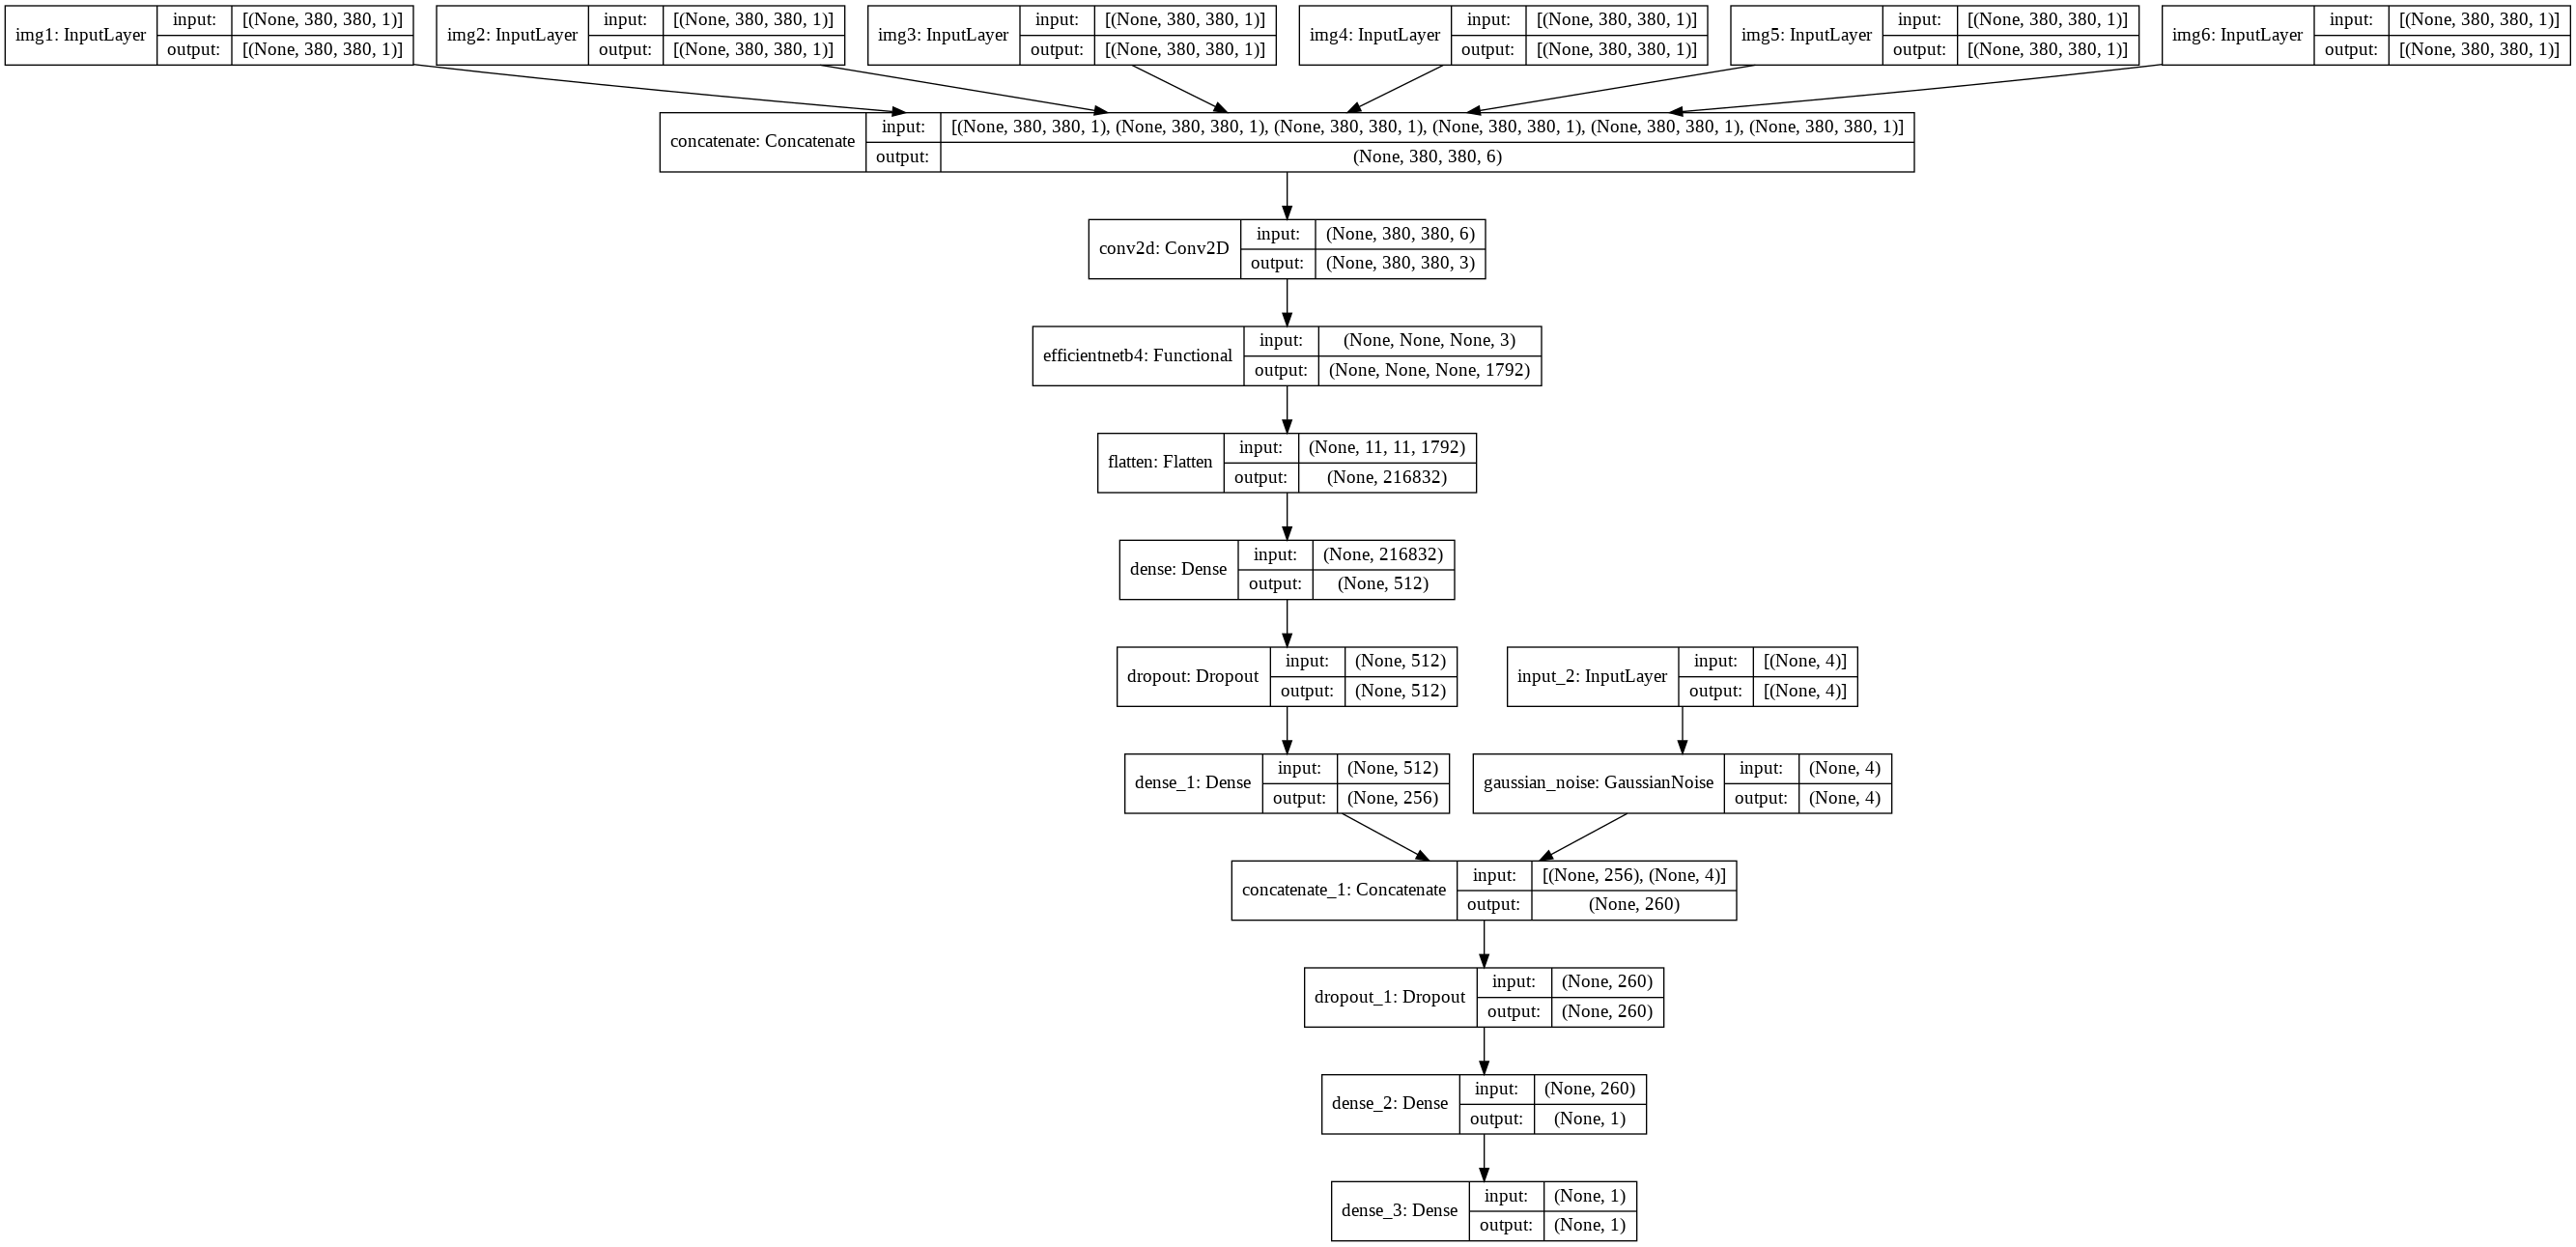

In [ ]:
tensorflow.keras.utils.plot_model(model_effnet_B4, 'model_effnet_B4.png', show_shapes=True)

In [ ]:
# Model compilation with Adam optimizer having learning_rate is 0.001 and loss is Mean Absolute Error

model_effnet_B4.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001), loss='mae')

tr_p, vl_p = train_test_split(P, shuffle=True, train_size= 0.8) 

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

es = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=1e-3,patience=4,verbose=1,mode="auto", 
                                      baseline=None,restore_best_weights=True,)

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau
my_callbacks = [es,tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(filepath = 'drive1/Colab Notebooks/' + 'model_6_image_effnet_B4.h5', 
                                       verbose=1, save_best_only=True, save_weights_only=False) ]

In [ ]:
# running the model with steps_per_epoch = 100 & validation_steps = 20 
history_effnet_B4_Pass_2_images = model_effnet_B4.fit_generator(IGenerator(keys=tr_p, 
                               a = A, 
                               tab = TAB), 
                    steps_per_epoch = 100,
                    validation_data=IGenerator(keys=vl_p, 
                               a = A, 
                               tab = TAB),
                    validation_steps = 20, 
                    callbacks = my_callbacks, 
                    epochs=4)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
100/100 [==============================] - 2839s 28s/step - loss: 5.4561 - val_loss: 5.5081

Epoch 00001: val_loss improved from inf to 5.50811, saving model to drive1/Colab Notebooks/model_6_image_effnet_B4.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/4
100/100 [==============================] - 2362s 24s/step - loss: 5.3690 - val_loss: 5.1364

Epoch 00002: val_loss improved from 5.50811 to 5.13637, saving model to drive1/Colab Notebooks/model_6_image_effnet_B4.h5
Epoch 3/4
100/100 [==============================] - 2259s 23s/step - loss: 5.1774 - val_loss: 4.7852

Epoch 00003: val_loss improved from 5.13637 to 4.78515, saving model to drive1/Colab Notebooks/model_6_image_effnet_B4.h5
Epoch 4/4
100/100 [==============================] - 2046s 20s/step - loss: 5.5552 - val_loss: 6.7290

Epoch 00004: val_loss did not improve from 4.78515


# Predictions are evaluated with a modified version of the following
# Laplace Log Likelihood

In [ ]:
# Predictions are evaluated with a modified version of the Laplace Log Likelihood

def score(fvc_true, fvc_pred, sigma):
    sigma_clip = np.maximum(sigma,70)
    delta = np.abs(fvc_true - fvc_pred)
    delta = np.minimum(delta,1000)
    sqrt = np.sqrt(2)
    metric = (delta/sigma_clip)*sqrt + np.log(sigma_clip*sqrt)
    return np.mean(metric)

In [ ]:
from tqdm.notebook import tqdm

metric = []
for q in tqdm(range(1, 10)):
    m = []
    for p in vl_p:
        x,y,z,w,u,v = [], [], [], [], [], []
        tab = [] 
        
        if p in ['ID00011637202177653955184', 'ID00052637202186188008618']:
            continue
            
        if os.path.isdir('drive1/Colab Notebooks/train2/' + p)== True:
          img_set = os.listdir(f'drive1/Colab Notebooks/train2/{p}/')
          img_set = np.random.choice(img_set, size=20)
          for i in img_set:
            x.append(get_img(f'drive1/Colab Notebooks/train2/{p}/{i}')) 
            y.append(get_img(f'drive1/Colab Notebooks/train2/{p}/{i}'))
            z.append(get_img(f'drive1/Colab Notebooks/train2/{p}/{i}'))
            w.append(get_img(f'drive1/Colab Notebooks/train2/{p}/{i}'))
            u.append(get_img(f'drive1/Colab Notebooks/train2/{p}/{i}'))
            v.append(get_img(f'drive1/Colab Notebooks/train2/{p}/{i}'))
            tab.append(get_tab(train.loc[train.Patient == p, :])) 
        else:  
          img_set = os.listdir(f'drive/My Drive/Colab Notebooks/train1/{p}/')
          img_set = np.random.choice(img_set, size=20)
          for i in img_set:
            x.append(get_img(f'drive/My Drive/Colab Notebooks/train1/{p}/{i}')) 
            y.append(get_img(f'drive/My Drive/Colab Notebooks/train1/{p}/{i}'))
            z.append(get_img(f'drive/My Drive/Colab Notebooks/train1/{p}/{i}'))
            w.append(get_img(f'drive/My Drive/Colab Notebooks/train1/{p}/{i}'))
            u.append(get_img(f'drive/My Drive/Colab Notebooks/train1/{p}/{i}'))
            v.append(get_img(f'drive/My Drive/Colab Notebooks/train1/{p}/{i}'))
            tab.append(get_tab(train.loc[train.Patient == p, :]))
         
        tab = np.array(tab) 
    
        x = np.expand_dims(x, axis=-1)
        y = np.expand_dims(y, axis=-1)
        z = np.expand_dims(z, axis=-1)
        w = np.expand_dims(w, axis=-1)
        u = np.expand_dims(u, axis=-1)
        v = np.expand_dims(v, axis=-1)
        _a = model_effnet_B4.predict([x,y,z,w,u,v, tab])
        a = np.quantile(_a, q / 10)
        
        percent_true = train.Percent.values[train.Patient == p]
        fvc_true = train.FVC.values[train.Patient == p]
        weeks_true = train.Weeks.values[train.Patient == p]
        
        fvc = a * (weeks_true - weeks_true[0]) + fvc_true[0]
        percent = percent_true[0] - a * abs(weeks_true - weeks_true[0])
        m.append(score(fvc_true, fvc, percent))

    print(np.mean(m))
    metric.append(np.mean(m))

  0%|          | 0/9 [00:00<?, ?it/s]

7.47565712026358
7.47565712026358
7.47565712026358
7.47565712026358
7.47565712026358
7.47565712026358
7.47565712026358
7.47565712026358
7.47565712026358


In [ ]:
q = (np.argmin(metric) + 1)/ 10
q 

0.1

In [ ]:
'''sub = pd.read_csv('drive/My Drive/Colab Notebooks/sample_submission.csv') 
sub

,Patient_Week,FVC,Confidence
0,ID00419637202311204720264_-12,2000,100
1,ID00421637202311550012437_-12,2000,100
2,ID00422637202311677017371_-12,2000,100
3,ID00423637202312137826377_-12,2000,100
4,ID00426637202313170790466_-12,2000,100


In [ ]:
# test data
test = pd.read_csv('drive/My Drive/Colab Notebooks/test.csv') 
test.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


In [ ]:
A_test, B_test, P_test, FVC= {}, {}, {},{}
STD, WEEK = {}, {} 
for p in test.Patient.unique():
    x,y,z,w,u,v = [], [], [], [], [], []
    tab = [] 

    if os.path.isdir('drive1/Colab Notebooks/train2/' + p)== True:
      img_set = os.listdir(f'drive1/Colab Notebooks/train2/{p}/')
      img_set = np.random.choice(img_set, size=20)
      for i in img_set:
          x.append(get_img(f'drive1/Colab Notebooks/train2/{p}/{i}')) 
          y.append(get_img(f'drive1/Colab Notebooks/train2/{p}/{i}'))
          z.append(get_img(f'drive1/Colab Notebooks/train2/{p}/{i}')) 
          w.append(get_img(f'drive1/Colab Notebooks/train2/{p}/{i}'))
          u.append(get_img(f'drive1/Colab Notebooks/train2/{p}/{i}')) 
          v.append(get_img(f'drive1/Colab Notebooks/train2/{p}/{i}'))

          tab.append(get_tab(train.loc[train.Patient == p, :])) 
    else: 
      img_set = os.listdir(f'drive/My Drive/Colab Notebooks/train1/{p}/')
      img_set = np.random.choice(img_set, size=20)
      for i in img_set:

          x.append(get_img(f'drive/My Drive/Colab Notebooks/train1/{p}/{i}')) 
          y.append(get_img(f'drive/My Drive/Colab Notebooks/train1/{p}/{i}'))
          z.append(get_img(f'drive/My Drive/Colab Notebooks/train1/{p}/{i}'))
          w.append(get_img(f'drive/My Drive/Colab Notebooks/train1/{p}/{i}'))
          u.append(get_img(f'drive/My Drive/Colab Notebooks/train1/{p}/{i}'))
          v.append(get_img(f'drive/My Drive/Colab Notebooks/train1/{p}/{i}'))
          
          tab.append(get_tab(train.loc[train.Patient == p, :]))

   
    tab = np.array(tab) 
            
    x = np.expand_dims(x, axis=-1) 
    y = np.expand_dims(y, axis=-1)
    z = np.expand_dims(z, axis=-1) 
    w = np.expand_dims(w, axis=-1)
    u = np.expand_dims(u, axis=-1) 
    v = np.expand_dims(v, axis=-1) 

    _a = model_effnet_B4.predict([x,y,z,w,u,v, tab]) 
    a = np.quantile(_a, q)
    A_test[p] = a
    B_test[p] = test.FVC.values[test.Patient == p] - a*test.Weeks.values[test.Patient == p]
    P_test[p] = test.Percent.values[test.Patient == p] 
    WEEK[p] = test.Weeks.values[test.Patient == p]

In [ ]:
for k in sub.Patient_Week.values:
    p, w = k.split('_')
    w = int(w) 
    
    fvc = A_test[p] * w + B_test[p]
    sub.loc[sub.Patient_Week == k, 'FVC'] = fvc
    sub.loc[sub.Patient_Week == k, 'Confidence'] = (
        P_test[p] - A_test[p] * abs(WEEK[p] - w) 
) 
sub.head()

,Patient_Week,FVC,Confidence
0,ID00419637202311204720264_-12,3020.0,70.186855
1,ID00421637202311550012437_-12,2739.0,82.045291
2,ID00422637202311677017371_-12,1930.0,76.672493
3,ID00423637202312137826377_-12,3294.0,79.258903
4,ID00426637202313170790466_-12,2925.0,71.824968


In [ ]:
# https://stackoverflow.com/a/66237999
sub[["Patient_Week","FVC","Confidence"]].to_csv("drive/My Drive/Colab Notebooks/submission.csv", index=False, encoding='utf-8-sig')

sub[["Patient_Week","FVC","Confidence"]].to_csv("drive1/Colab Notebooks/submission.csv", index=False, encoding='utf-8-sig')

In [ ]:
sub_sub = pd.read_csv("drive/My Drive/Colab Notebooks/submission.csv") 
sub_sub.head() 

,Patient_Week,FVC,Confidence
0,ID00419637202311204720264_-12,3020.0,70.186855
1,ID00421637202311550012437_-12,2739.0,82.045291
2,ID00422637202311677017371_-12,1930.0,76.672493
3,ID00423637202312137826377_-12,3294.0,79.258903
4,ID00426637202313170790466_-12,2925.0,71.824968


In [ ]:
sub_sub = pd.read_csv("drive1/Colab Notebooks/submission.csv") 
sub_sub.head() 

,Patient_Week,FVC,Confidence
0,ID00419637202311204720264_-12,3020.0,70.186855
1,ID00421637202311550012437_-12,2739.0,82.045291
2,ID00422637202311677017371_-12,1930.0,76.672493
3,ID00423637202312137826377_-12,3294.0,79.258903
4,ID00426637202313170790466_-12,2925.0,71.824968
